<a href="https://colab.research.google.com/github/graceetzel/Numerical-Analysis/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2

**Part (b)**

First, we defined the Hilbert Matrix below according to the definition in the assignment. We made it into an array for organizational purposes.

In [ ]:
#Define Hilbert Matrix
import numpy as np

def hilbert_matrix(n):
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i, j] = 1 / (i + j + 1)
    return H

#Create an array for Hilbert Matrices
lists=[2,3,5,10]
A=[hilbert_matrix(i) for i in lists]
print(A)

#Do a similar thing for b
b=[np.ones(i) for i in lists]
print(b)

[array([[1.        , 0.5       ],
       [0.5       , 0.33333333]]), array([[1.        , 0.5       , 0.33333333],
       [0.5       , 0.33333333, 0.25      ],
       [0.33333333, 0.25      , 0.2       ]]), array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111]]), array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
       [0.25      , 0.2       , 0.16

For the code below, we try to replicate partial pivoting by setting $PA=LU$. We used the code from the lectures and AI for assistance in creating this code. Additionally, we estimated the time it took for the computer to solve the factorization problem.

In [ ]:
import numpy as np
import time
#AI helped me with this code
def lu_factorization_pivoting(A):
    A = A.copy().astype(float)
    n = A.shape[0]
    L = np.eye(n)
    U = A.copy()
    P = np.eye(n)
    for j in range(n):
        # Partial pivoting insertion
        pivot = np.argmax(np.abs(U[j:, j])) + j
        # Swap rows in U
        if pivot != j:
            U[[j, pivot]] = U[[pivot, j]]
            P[[j, pivot]] = P[[pivot, j]]
            if j > 0:
                L[[j, pivot], :j] = L[[pivot, j], :j]
        # Elimination
        for i in range(j + 1, n):
            mult = U[i, j] / U[j, j]
            L[i, j] = mult
            U[i, j:] -= mult * U[j, j:]

    return P, L, U
#time for the lu factorization for n=2
fac_time_start_1 = time.perf_counter()
Piv_1, L_1, U_1 = lu_factorization_pivoting(A[0])
fac_time_end_1 = time.perf_counter()
#Cal total diff
fac_time_1 = fac_time_end_1 - fac_time_start_1
print(fac_time_1)

#time for lu factorization for n=3
fac_time_start_2 = time.perf_counter()
Piv_2, L_2, U_2 = lu_factorization_pivoting(A[1])
fac_time_end_2 = time.perf_counter()
#Cal total diff
fac_time_2 = fac_time_end_2 - fac_time_start_2
print(fac_time_2)

#time for lu factorization for n=5
fac_time_start_3 = time.perf_counter()
Piv_3, L_3, U_3 = lu_factorization_pivoting(A[2])
fac_time_end_3 = time.perf_counter()
#Cal total diff
fac_time_3 = fac_time_end_3 - fac_time_start_3
print(fac_time_3)

#time for lu factorization for n=10
fac_time_start_5 = time.perf_counter()
Piv_4, L_4, U_4 = lu_factorization_pivoting(A[3])
fac_time_end_5 = time.perf_counter()
#Cal total diff
fac_time_4 = fac_time_end_5 - fac_time_start_5
print(fac_time_4)

0.0003384599999662896
0.0005230439999195369
0.000471400999913385
0.0009284049999678246


THe code below solves $LU$ factorization through forward and backward substitution. To get this code, we used both AI for assistance and the code in lectures. Additionally, we calculate the time for the computer to perform this code.

In [ ]:
#AI helped me with this code

def lu_solve_pivoting(P, L, U, b):
    n = len(b)
    # Apply permutation to b
    b = np.dot(P, b)
    # Forward substitution: Ly = Pb
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i] - np.dot(L[i, :i], y[:i])
    # Back substitution: Ux = y
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i + 1:], x[i + 1:])) / U[i, i]

    return x

#time for solve n=2
sol_time_start_1 = time.perf_counter()
num_x_1 = lu_solve_pivoting(Piv_1, L_1, U_1, b[0])
sol_time_end_1 = time.perf_counter()
#Cal total diff
sol_time_1 = sol_time_end_1 - sol_time_start_1
print(sol_time_1)

#time for solve n=3
sol_time_start_2 = time.perf_counter()
num_x_2 = lu_solve_pivoting(Piv_2, L_2, U_2, b[1])
sol_time_end_2 = time.perf_counter()
#Cal total diff
sol_time_2 = sol_time_end_2 - sol_time_start_2
print(sol_time_2)

#time for solve n=5
sol_time_start_3 = time.perf_counter()
num_x_3 = lu_solve_pivoting(Piv_3, L_3, U_3, b[2])
sol_time_end_3 = time.perf_counter()
#Cal total diff
sol_time_3 = sol_time_end_3 - sol_time_start_3
print(sol_time_3)

#time for solve n=10
sol_time_start_4 = time.perf_counter()
num_x_4 = lu_solve_pivoting(Piv_4, L_4, U_4, b[3])
sol_time_end_4 = time.perf_counter()
#Cal total diff
sol_time_4 = sol_time_end_4 - sol_time_start_4
print(sol_time_4)


print("Solution x:")
print(num_x_1,num_x_2,num_x_3,num_x_4)

0.0007708890000230895
0.0003213830000277085
0.0003106439999100985
0.0008607199999914883
Solution x:
[-2.  6.] [  3. -24.  30.] [    5.  -120.   630. -1120.   630.] [-9.99807293e+00  9.89833719e+02 -2.37564620e+04  2.40207863e+05
 -1.26110682e+06  3.78335918e+06 -6.72602993e+06  7.00061346e+06
 -3.93787022e+06  9.23703109e+05]


Below we solved the matrix using code provided by numpy.

In [ ]:
import numpy as np
x_0 = np.linalg.solve(A[0], b[0])
x_1 = np.linalg.solve(A[1], b[1])
x_2 = np.linalg.solve(A[2], b[2])
x_3 = np.linalg.solve(A[3], b[3])

print("Solution x:")
print(x_0,x_1,x_2,x_3)

print(b[0])

Solution x:
[-2.  6.] [  3. -24.  30.] [    5.          -120.           630.         -1120.00000001
   630.        ] [-9.99982337e+00  9.89984621e+02 -2.37596706e+04  2.40236992e+05
 -1.26124560e+06  3.78374027e+06 -6.72665461e+06  7.00121663e+06
 -3.93818664e+06  9.23772647e+05]
[1. 1.]


Next, we calculate the residual norm defined as
\begin{align}
r=||b-H\vec x||_2.
\end{align}
To do this, we utilized a package from numpy. Additionally, we compute the total time it took for the computer to do the whole calculation by adding the factorization time with the solving time. Lastly, we created a table to showcase all the results using dataframe from Pandas.

In [ ]:
import pandas as pd

#Residual Norm
def residual_norm(A, x, b, norm_type=2):
    r = b - A @ x
    return np.linalg.norm(r, ord=norm_type)
norm_x_1 = residual_norm(A[0],num_x_1, b[0])
norm_x_2 = residual_norm(A[1], num_x_2, b[1])
norm_x_3 = residual_norm(A[2], num_x_3, b[2])
norm_x_4 = residual_norm(A[3], num_x_4, b[3])

#Add total time between factorization and solving
total_time_1 = fac_time_1 + sol_time_1
total_time_2 = fac_time_2 + sol_time_2
total_time_3 = fac_time_3 + sol_time_3
total_time_4 = fac_time_4 + sol_time_4

#Table
data = {"n": [2,3,5,10],
    "Time": [total_time_1,total_time_2,total_time_3,total_time_4],
    "Residual Norm": [norm_x_1,norm_x_2,norm_x_3,norm_x_4]}
df = pd.DataFrame(data)
print(df)

    n      Time  Residual Norm
0   2  0.001109   0.000000e+00
1   3  0.000844   2.220446e-16
2   5  0.000782   2.903228e-14
3  10  0.001789   3.331086e-10


**Part (c)**

Below we compute the 2-norm for the Hilbert matrices using numpy.

In [ ]:
import numpy as np
#computation of 2-norm for a given n={2,3,5,10}
kappa_2_1 = np.linalg.cond(A[0],2)
kappa_2_2 = np.linalg.cond(A[1],2)
kappa_2_3 = np.linalg.cond(A[2],2)
kappa_2_4 = np.linalg.cond(A[3],2)

print(kappa_2_1, kappa_2_2,kappa_2_3,kappa_2_4)

19.28147006790397 524.0567775860644 476607.2502425855 16024416987428.36


Below we compute infinity-norm for the Hilbert matrices using numpy.

In [ ]:
import numpy as np

# Compute the condition number in the infinity norm
kappa_inf_1 = np.linalg.cond(A[0], np.inf)
kappa_inf_2 = np.linalg.cond(A[1], np.inf)
kappa_inf_3 = np.linalg.cond(A[2], np.inf)
kappa_inf_4 = np.linalg.cond(A[3], np.inf)

print(kappa_inf_1,kappa_inf_2,kappa_inf_3,kappa_inf_4)

27.00000000000001 748.0000000000027 943656.0000063627 35356847610517.12


Below we organize the following results in a table with $n$, infinity norm, and 2-norm.

In [ ]:
data_p = {"n":[2,3,5,10],
          "2 Norm":[kappa_2_1,kappa_2_2,kappa_2_3,kappa_2_4],
          "Infinity Norm":[kappa_inf_1,kappa_inf_2,kappa_inf_3,kappa_inf_4]}
df_p = pd.DataFrame(data_p)
print(df_p)

    n        2 Norm  Infinity Norm
0   2  1.928147e+01   2.700000e+01
1   3  5.240568e+02   7.480000e+02
2   5  4.766073e+05   9.436560e+05
3  10  1.602442e+13   3.535685e+13


# Problem 3

First, we define the matrix and the following variable

In [ ]:
import numpy as np

eps = 10e-12
A=np.array([[eps, 1, 1],
            [1,1,1],
            [1,1,2]])
b=np.array([2,3,4])

Below we replicate the code from Problem 2 for $LU$ decomposition without pivoting.

In [ ]:

#Recieved this code from the lecture notes
def lu_factorization(A):
  n = A.shape[0]
  L = np.eye(n) # Identity for L diagonal
  U = A.copy()
  for j in range(n - 1):
    if abs(U[j, j]) < 1e-100:
      raise ValueError('Zero pivot encountered')
    for i in range(j + 1, n):
      mult = U[i, j] / U[j, j]
      L[i, j] = mult
      for k in range(j, n):
        U[i, k] -= mult * U[j, k]
  return L, U

def lu_solve(L, U, b):
  n = len(b)
  # Forward sub: Ly = b
  y = np.zeros(n)
  for i in range(n):
    sum_ly = sum(L[i, j] * y[j] for j in range(i))
    y[i] = (b[i] - sum_ly) / L[i, i]
    # Back sub: Ux = y
    x = np.zeros(n)
  for i in range(n - 1, -1, -1):
    sum_ux = sum(U[i, j] * x[j] for j in range(i + 1, n))
    x[i] = (y[i] - sum_ux) / U[i, i]
  return x

Next, we solve without pivoting, which we can see below. We incorporate time (out of comparison), although there is no specific need to in the instructions on the assignment. This more of my own exploration.

In [ ]:
import time

#Time consideration for the factorization
fac_time_start = time.perf_counter()
L, U = lu_factorization(A)
fac_time_end = time.perf_counter()
#Cal total diff
fac_time = fac_time_end - fac_time_start

#Time consideration for the non-factorization
sol_time_start = time.perf_counter()
x = lu_solve(L, U, b)
sol_time_end = time.perf_counter()
#Cal total diff
sol_time = sol_time_end - sol_time_start
print("Solution x:")
print(x)
print("Factorization time: ", fac_time)
print("Solution time: ", sol_time)



Solution x:
[1.00000008 1.         1.        ]
Factorization time:  0.00017505200003142818
Solution time:  9.308100015914533e-05


Notice that the code above will depend on how we define the epsilon. Originally, the zero pivot was defined at $10^{-10}$, which led to an error because $\varepsilon=10^{-12}$. However, we must note that we had to redefine the zero pivot based on the code from the lecture notes so as to get a solution. Next, we will do the same steps, but with the partial pivoting, using the code from Problem 2.

In [ ]:
def lu_factorization_pivoting(A):
    A = A.copy().astype(float)
    n = A.shape[0]
    L = np.eye(n)
    U = A.copy()
    P = np.eye(n)
    for j in range(n):
        # Partial pivoting insertion
        pivot = np.argmax(np.abs(U[j:, j])) + j
        # Swap rows in U
        if pivot != j:
            U[[j, pivot]] = U[[pivot, j]]
            P[[j, pivot]] = P[[pivot, j]]
            if j > 0:
                L[[j, pivot], :j] = L[[pivot, j], :j]
        # Elimination
        for i in range(j + 1, n):
            mult = U[i, j] / U[j, j]
            L[i, j] = mult
            U[i, j:] -= mult * U[j, j:]

    return P, L, U


def lu_solve_pivoting(P, L, U, b):
    n = len(b)
    # Apply permutation to b
    b = np.dot(P, b)
    # Forward substitution: Ly = Pb
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i] - np.dot(L[i, :i], y[:i])
    # Back substitution: Ux = y
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i + 1:], x[i + 1:])) / U[i, i]

    return x


As in the previous calculation, we calculate the solution with the time.

In [ ]:
#time for the lu factorization for n=2
fac_time_start_1 = time.perf_counter()
Piv_1, L_1, U_1 = lu_factorization_pivoting(A)
fac_time_end_1 = time.perf_counter()
#Cal total diff
fac_time_1 = fac_time_end_1 - fac_time_start_1

#time for solve n=2
sol_time_start_1 = time.perf_counter()
num_x_1 = lu_solve_pivoting(Piv_1, L_1, U_1, b)
sol_time_end_1 = time.perf_counter()
#Cal total diff
sol_time_1 = sol_time_end_1 - sol_time_start_1

#Printing solution and times
print("Solution x:")
print(num_x_1)
print("Factorization time: ", fac_time_1)
print("Solution time: ", sol_time_1)

Solution x:
[1. 1. 1.]
Factorization time:  0.0009035789998961263
Solution time:  0.00020129499989707256


For our last calculation, we use package to give a reference for our solution.

In [ ]:
x_sol = np.linalg.solve(A, b)
print("Solution x:")
print(x_sol)

Solution x:
[1. 1. 1.]


Next, we obtain residuals by calculating
\begin{align*}
r=||\vec x_{method}-\vec x_{ref}||_2,
\end{align*}
where $\vec x_{ref}$ represents the numerical solution generated from the Python package. The code below attempts to replicate this.

In [ ]:
#Defining function based on formula above
def forward_error_norm(A,b,x):
  x_ref = np.linalg.solve(A, b)
  r=np.linalg.norm(x-x_ref)
  return r

#Retrieving residuals
forward_error_norm_1 = forward_error_norm(A, b,num_x_1)
forward_error_norm_2 = forward_error_norm(A, b,x)

#Printing result
print(num_x_1)
print(x)
print(f'forward error norm 1 = {forward_error_norm_1}')
print(f'forward error norm 2 = {forward_error_norm_2}')

[1. 1. 1.]
[1.00000008 1.         1.        ]
forward error norm 1 = 0.0
forward error norm 2 = 8.273037099826297e-08


Note that we can see a visible difference between the two methods not by much. For context, the forward error norm 1 defines the pivot method while the forward error norm 2 defines the non-pivot method. Notice that the error for the pivot method is approximately zero whereas the non-pivot method is close to zero, but has a small error. Next, we create a table of the following values: residual norm, the solution, time for computation.

In [ ]:
import pandas as pd

#time change
time_1 = fac_time + sol_time
time_2 = fac_time_1 + sol_time_1

#Create the data
data = {"Method Type":["Non Pivot Method","Pivot Method"],
        "Residual Norm":[forward_error_norm_2, forward_error_norm_1,],
        "Solution":[x,num_x_1,],
        "Time":[time_1, time_2]
        }

#Make dataframe and print table
df=pd.DataFrame(data)
print(df)

        Method Type  Residual Norm                                 Solution  \
0  Non Pivot Method   8.273037e-08  [1.000000082740371, 0.99999999999, 1.0]   
1      Pivot Method   0.000000e+00      [1.00000000001, 0.99999999999, 1.0]   

       Time  
0  0.000268  
1  0.001105  


Notice that the solution in the non pivot method is slightly less consistent to the correct solution than the pivot the method. Additionally, another observation is that the time for the pivot method is longer than the non pivot method. My explanation for this may be that the code in the pivot method is longer, so the time for the solution to be complete may take longer. Next, we will consider $\kappa(A)_2$.

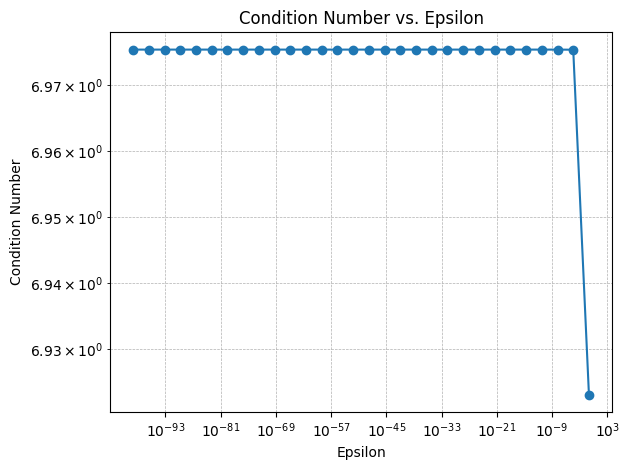

[1.00000000e-001 3.85662042e-005 1.48735211e-008 5.73615251e-012
 2.21221629e-015 8.53167852e-019 3.29034456e-022 1.26896100e-025
 4.89390092e-029 1.88739182e-032 7.27895384e-036 2.80721620e-039
 1.08263673e-042 4.17531894e-046 1.61026203e-049 6.21016942e-053
 2.39502662e-056 9.23670857e-060 3.56224789e-063 1.37382380e-066
 5.29831691e-070 2.04335972e-073 7.88046282e-077 3.03919538e-080
 1.17210230e-083 4.52035366e-087 1.74332882e-090 6.72335754e-094
 2.59294380e-097 1.00000000e-100]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

eps = np.logspace(-1, -100, 30)

A = [np.array([[e, 1, 1],
               [1, 1, 1],
               [1, 1, 2]]) for e in eps]

b = [np.array([2, 3, 4]) for _ in eps]

# Compute condition numbers using 2-norm
kappas = [np.linalg.cond(matrix, 2) for matrix in A]

#Assisted with AI
#graph
plt.plot(eps, kappas, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Condition Number')
plt.title('Condition Number vs. Epsilon')
plt.grid(True, which='both', ls='--', lw=0.5)
plt.tight_layout()
plt.show()
print(eps)


Above we have a graph of the conditional number from $\kappa(A)_2$ based on different values of epsilons. The idea here is to see how different epsilons lead to a change in the conditional number. For a stable system, we would hypothesize that this number would not change very much and consist of a lower value. Notice that this function above is very consistent until a slight, yet sudden drop, as approaches $\varepsilon\approx 0.01$ from the left hand side. In terms of stability, changing $ɛ$ to be closer to $1$ interrupts the stability of the conditional number. That is, small changes in $epsilon$ have an impact on the stability depending on where the change occurs.

In terms of numerical convience, the pivoting code can be helpful so as to aviod errors. Although we are dealing with very small numbers here. A matrix that incorporates a 0 in the pivot position would produce an error, being unsolvable for the computer. However, the pivoting code expands the set of matrices that we would be allowed to numerically calculate, since pivoting may allow us switch rows for those that have zeros in a pivot position. However, the cost is that the pivoting code is technically longer on a time scale than the non-pivoting code as referenced above.

While coding this exercise, there were not many roundoff errors. However, I would like to note that the zero pivoting error can create issues depending on how small the zero is defined. Defining zero for a very small quantity (say $10^{-40}$) is possible to do in the code without error; however, this does not mean that there may not be rounding errors within the computations. Therefore, defining the zero may impact any potiential roundoff errors.